# Starter Code

In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns

In [162]:
url = "https://raw.githubusercontent.com/Cherecho/fat-percentage-ai/main/dataset/bodyfat.csv"
df = pd.read_csv(url)
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [163]:
def hat_matrix(X):
  X_transpose = np.transpose(X)
  XTX = np.dot(X_transpose, X)
  XTX_inv = np.linalg.inv(XTX)
  H = np.dot(X,XTX_inv)
  H = np.dot(H,X_transpose)
  fig, ax = plt.subplots(figsize=(10, 10))
  sns.heatmap(H, cmap="YlGnBu",ax=ax)
  plt.show()
  

# Simple Linear Regression

In [164]:
X = df.drop(['BodyFat'],axis=1)
Y = df['BodyFat']

In [165]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [166]:
model.fit(X,Y)

LinearRegression()

In [167]:
Y_pred = model.predict(X)

In [168]:
from sklearn.metrics import mean_squared_error
mse_simpleLR = mean_squared_error(Y,Y_pred)
print(mse_simpleLR)

1.5272035183908077


Text(0, 0.5, 'Y_pred')

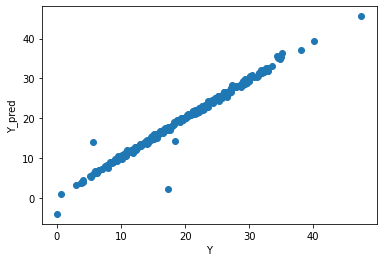

In [169]:
plt.scatter(Y,Y_pred)
plt.xlabel("Y")
plt.ylabel('Y_pred')


In [170]:
from sklearn.metrics import mean_squared_error, r2_score
initial_mse = mean_squared_error(Y,Y_pred)
initial_r2 = r2_score(Y_pred,Y)
print("Final Mean Square Error - ",mean_squared_error(Y,Y_pred))
print("Final R squared - ",r2_score(Y_pred,Y))
initial_predValues = Y_pred.copy()

Final Mean Square Error -  1.5272035183908077
Final R squared -  0.9776170597355986


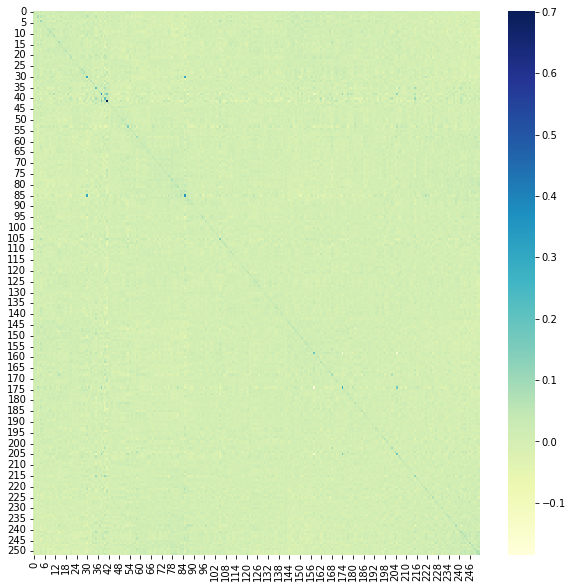

In [171]:
hat_matrix(X)

# Removing Outliers using Cook's Distance

In [172]:
def cooks_distance(y_pred, y_pred_i, m, d):
  cd = np.linalg.norm(y_pred-y_pred_i)**2/(m*d)
  return cd

In [173]:
def getCooksDistance(X,Y,y_pred):
  cooks_dist = []
  mses = []
  X = np.array(X)
  Y = np.array(Y)
  y_pred = np.array(y_pred)
  outliers = []
  for i in range(len(Y_pred)):
    x_i = np.delete(X, i, axis=0)
    y_i = np.delete(Y, i, axis=0)
    test_model = LinearRegression()
    test_model.fit(x_i,y_i)
    y_pred_i = test_model.predict(x_i)
    mses.append(mean_squared_error(y_i,y_pred_i))
    test_y_pred = np.delete(y_pred,i,axis=0)
    cooks_dist.append(cooks_distance(test_y_pred,y_pred_i,mses[i],X.shape[1]))
  return cooks_dist

In [174]:
def getOutlierPoint(cooksDistances):
  pt = cooksDistances.index(max(cooksDistances))
  return pt

95


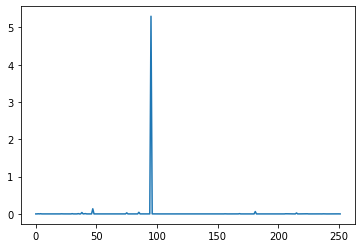

In [175]:
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

## Removing Outliers

47


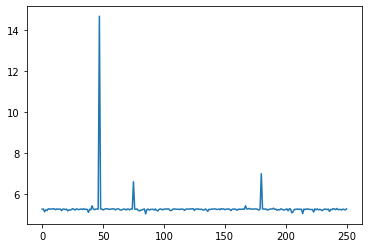

In [176]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

179


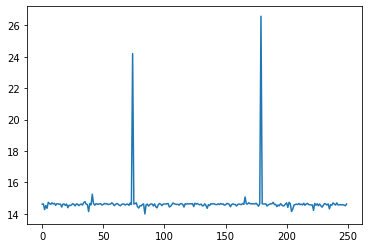

In [177]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

74


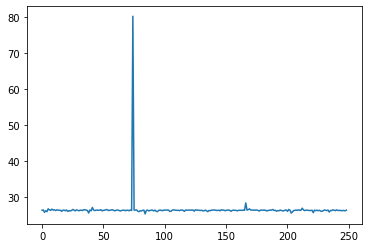

In [178]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

165


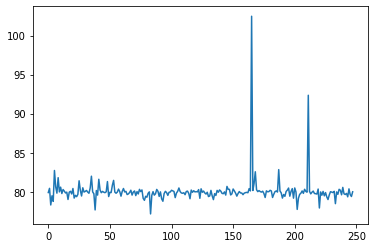

In [179]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

210


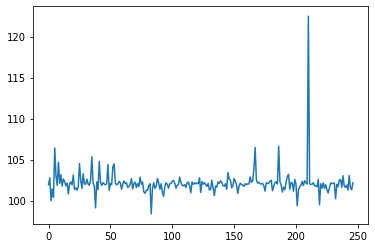

In [180]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

35


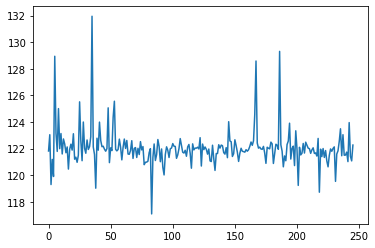

In [181]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

166


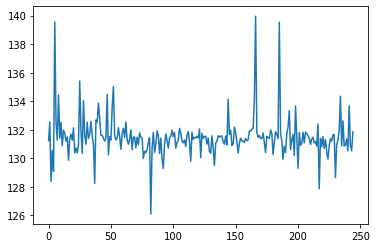

In [182]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

5


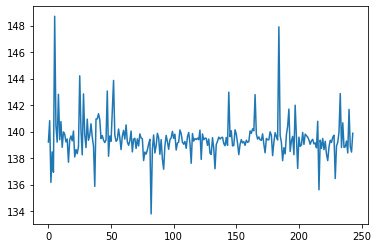

In [183]:
X = np.delete(X,outlierPoint,axis=0)
Y = np.delete(Y,outlierPoint,axis=0)
Y_pred = np.delete(Y_pred,outlierPoint,axis=0)
X = np.array(X)
Y = np.array(Y)
cooksDistances = getCooksDistance(X,Y,Y_pred)
outlierPoint = getOutlierPoint(cooksDistances)
print(outlierPoint)
plt.plot(range(len(cooksDistances)),cooksDistances)

Text(0, 0.5, 'Y_pred')

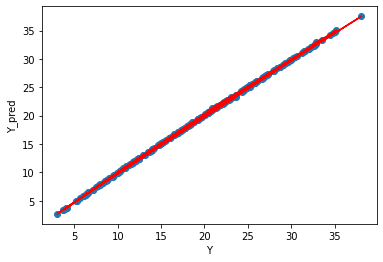

In [184]:
model.fit(X,Y)
y_pred_nonOutlier = model.predict(X)
plt.scatter(Y,y_pred_nonOutlier)
plt.plot(Y,y_pred_nonOutlier,color="r")
plt.xlabel("Y")
plt.ylabel('Y_pred')

In [185]:
from sklearn.metrics import mean_squared_error, r2_score
mse_simpleLR = mean_squared_error(Y,y_pred_nonOutlier)

print("Final Mean Square Error - ",mse_simpleLR)
print("Final R squared - ",r2_score(y_pred_nonOutlier,Y))

Final Mean Square Error -  0.02058891857692581
Final R squared -  0.999669648790203


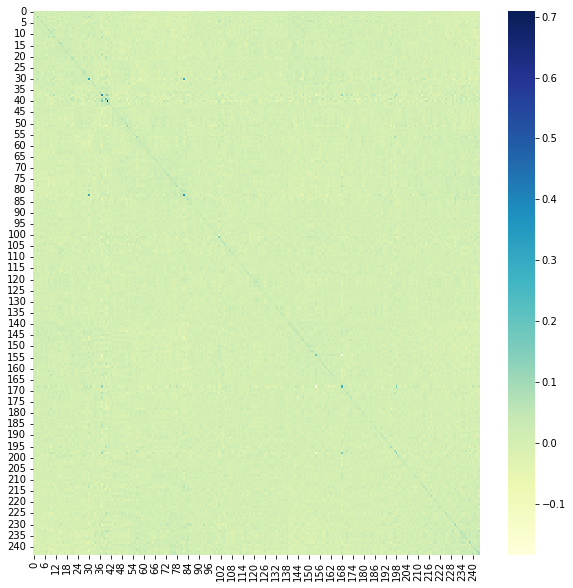

In [186]:
hat_matrix(X)

# Box-Cox Transformation

In [187]:
residuals = df['BodyFat'] - initial_predValues
std_residuals = residuals / np.sqrt(mean_squared_error(Y,Y_pred))

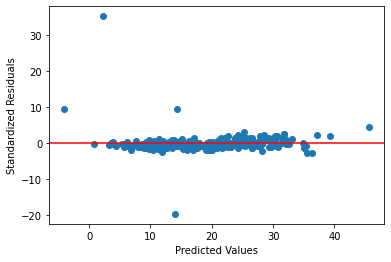

In [188]:
plt.scatter(initial_predValues, std_residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Standardized Residuals')
plt.show()

In [189]:
from scipy.stats import boxcox

Y_transformed, lambda_value = boxcox(Y)

model.fit(X, Y_transformed)


Y_pred_transformed = model.predict(X)

Y_pred = np.power((Y_pred_transformed * lambda_value) + 1, 1 / lambda_value)

In [190]:
print(f'Lambda Value - {lambda_value}')
print(f'MSE - {mean_squared_error(Y_transformed,Y_pred_transformed)}')
print(f'R_squared - {r2_score(Y_transformed,Y_pred_transformed)}')

Lambda Value - 0.8205591653802756
MSE - 0.018069482477214044
R_squared - 0.999190166794015


0.9992946320780248

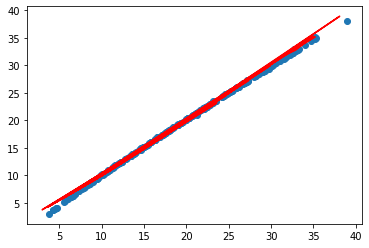

In [191]:
plt.scatter(Y_pred,Y)
plt.plot(Y,Y_pred,color="r")
r2_score(Y_pred,Y)

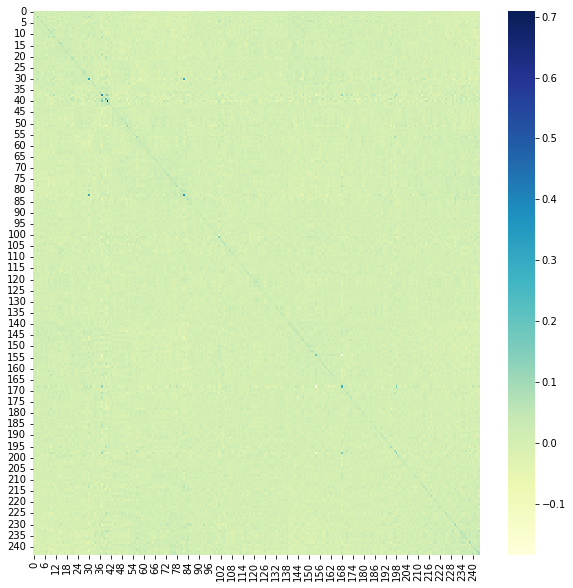

In [192]:
hat_matrix(X)